# Lesson 3 - 1D Diffusion

## Notes:
* in order to discretize the second order differential, we take both 1 step forward and 1 step back and expand those steps via a Taylor expansion. 
    * summing those steps yeilds the central difference approximation, with the understanding that it is second order accurate.
* the CFL condition here is: 
$$\nu\frac{\Delta t}{\Delta x^2}\leq \frac{1}{2}$$
* still need to make sure animation is installed correctlly and successfully

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

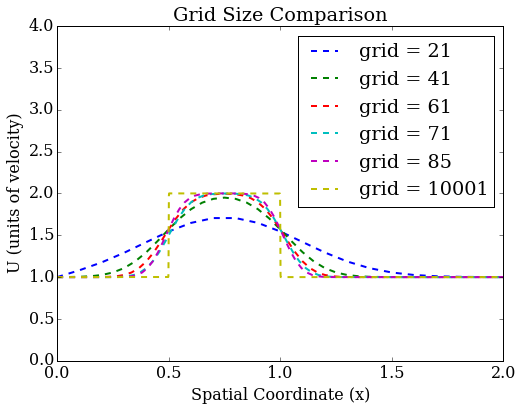

In [16]:
'''Here we will create the code neededto plot the diffusion of
the hat function we are so fond of. as always, multiple plots
on the same set of axis can show differentiation. the cell
after this will focus on the animation aspect. we will turn
the solution code into a function to plot multiple grids, 
similar to the method used in lesson 2.'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##creating function to accept only grid size as parameters
def lin_con(nx):
    '''solve the linear diffusion equation:
    
    solves the second order linear diffusion equation where 
    * the vicosity nu is set to 20
    * the domain is x in [0, 2]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    x : vector
        vector of x-values to show space-steps
    u : vector
        vector of solved values'''
    
    xdom = 2
    dx = xdom/(nx-1)
    nt = 20
    nu = 0.3   #the value of viscosity
    sigma = .2 
    #c = 1 - not needed in nonlinear case
    
    x = numpy.linspace(0,xdom,nx)

    dt = sigma*dx**2/nu
    
    u = numpy.ones(nx)
    u[numpy.intersect1d(numpy.where(x>=.5),
                        numpy.where(x<=1))]=2

    un = numpy.ones(nx) 

    for n in range(nt): 
        un = u.copy() 
        u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2])  
        #u[0] = 1.0
    return (x,u)

#create different grid sizes
(x21,u21)=lin_con(21)
(x41,u41)=lin_con(41)
(x61,u61)=lin_con(61)
(x71,u71)=lin_con(71)
(x85,u85)=lin_con(85)
(x10001, u10001) = lin_con(10001)

# Visualize
pyplot.figure(figsize=(8,6))
pyplot.title('Grid Size Comparison')
pyplot.ylabel('U (units of velocity)')
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylim(0,4)
pyplot.plot(x21,u21,ls='--',lw=2)
pyplot.plot(x41,u41,ls='--',lw=2)
pyplot.plot(x61,u61,ls='--',lw=2)
pyplot.plot(x71,u71,ls='--',lw=2)
pyplot.plot(x85,u85,ls='--',lw=2)
pyplot.plot(x10001,u10001,ls='--',lw=2)
pyplot.legend(['grid = 21','grid = 41','grid = 61',
               'grid = 71', 'grid = 85','grid = 10001'],
              loc='upper right')

In [17]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

nt = 50

u = numpy.ones(nx)      
u[numpy.intersect1d(lbound,ubound)] = 2  

un = numpy.ones(nx) 
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,2), ylim=(1,2.5))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

def diffusion(i):
    line.set_data(x,u)
    
    un = u.copy() 
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2]) 
    

animation.FuncAnimation(fig, diffusion,
                        frames=nt, interval=100)

ImportError: No module named 'JSAnimation'